In [9]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [10]:
data=pd.read_csv('Data file.csv')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [11]:
data.drop(['Alley','MasVnrType','BsmtExposure','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','FireplaceQu','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature','MiscVal'],axis=1,inplace=True)

In [12]:
df=pd.DataFrame(data=data)
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... GarageQual GarageCond PavedDrive  \
1455         Lvl    AllPub    Inside  ...         TA         TA          Y   
1456         Lvl    AllPub    Inside  ...         TA         TA          Y   
1457         Lvl    AllPub    Inside  ...         TA         TA          Y   
1458         Lvl    AllPub    Inside  ...         TA         TA          Y   
1459         Lvl    AllPub    Inside  ...         TA         TA          Y   

     WoodDeckSF OpenPorchSF MoSold  YrSold  SaleType  SaleCondition  SalePrice  
1455          0          40      8    2007        WD         Normal     175000  
1456        349           0      2    2010        WD         Normal     210000  
1457          0          60      5    2010        WD         Normal     266500  
1458        366           0      4    2010        WD         Normal     142125  
1459        736          68      6    2008        WD         Normal     147500  

[5 rows x 66 columns]

In [13]:
df.drop(['Id','MSSubClass','Utilities'],axis=1,inplace=True)

In [14]:
df.head()

MSZoning  LotFrontage  LotArea Street LotShape LandContour LotConfig  \
0       RL         65.0     8450   Pave      Reg         Lvl    Inside   
1       RL         80.0     9600   Pave      Reg         Lvl       FR2   
2       RL         68.0    11250   Pave      IR1         Lvl    Inside   
3       RL         60.0     9550   Pave      IR1         Lvl    Corner   
4       RL         84.0    14260   Pave      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1  ... GarageQual GarageCond PavedDrive  \
0       Gtl      CollgCr       Norm  ...         TA         TA          Y   
1       Gtl      Veenker      Feedr  ...         TA         TA          Y   
2       Gtl      CollgCr       Norm  ...         TA         TA          Y   
3       Gtl      Crawfor       Norm  ...         TA         TA          Y   
4       Gtl      NoRidge       Norm  ...         TA         TA          Y   

   WoodDeckSF  OpenPorchSF  MoSold  YrSold SaleType SaleCondition SalePrice  
0           0           61       2    2008       WD        Normal    208500  
1         298            0       5    2007       WD        Normal    181500  
2           0           42       9    2008       WD        Normal    223500  
3           0           35       2    2006       WD       Abnorml    140000  
4         192           84      12    2008       WD        Normal    250000  

[5 rows x 63 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrArea       1452 non-null float64
ExterQual        1460 non-null object
ExterCond        1460 

In [16]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
        'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold',
        'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
        'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
        'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
        'Garage

In [17]:
df.describe()

LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     70.049958   10516.828082     6.099315     5.575342  1971.267808   
std      24.284752    9981.264932     1.382997     1.112799    30.202904   
min      21.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      59.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      69.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      80.000000   11601.500000     7.000000     6.000000  2000.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF  ...  \
count   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  ...   
mean    1984.865753   103.685262   443.639726   567.240411  1057.429452  ...   
std       20.645407   181.066207   456.098091   441.866955   438.705324  ...   
min     1950.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     1967.000000     0.000000     0.000000   223.000000   795.750000  ...   
50%     1994.000000     0.000000   383.500000   477.500000   991.500000  ...   
75%     2004.000000   166.000000   712.250000   808.000000  1298.250000  ...   
max     2010.000000  1600.000000  5644.000000  2336.000000  6110.000000  ...   

       TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea  \
count   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000   
mean       6.517808     0.613014  1978.506164     1.767123   472.980137   
std        1.625393     0.644666    24.689725     0.747315   213.804841   
min        2.000000     0.000000  1900.000000     0.000000     0.000000   
25%        5.000000     0.000000  1961.000000     1.000000   334.500000   
50%        6.000000     1.000000  1980.000000     2.000000   480.000000   
75%        7.000000     1.000000  2002.000000     2.000000   576.000000   
max       14.000000     3.000000  2010.000000     4.000000  1418.000000   

        WoodDeckSF  OpenPorchSF       MoSold       YrSold      SalePrice  
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  
mean     94.244521    46.660274     6.321918  2007.815753  180921.195890  
std     125.338794    66.256028     2.703626     1.328095   79442.502883  
min       0.000000     0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000     0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000    25.000000     6.000000  2008.000000  163000.000000  
75%     168.000000    68.000000     8.000000  2009.000000  214000.000000  
max     857.000000   547.000000    12.000000  2010.000000  755000.000000  

[8 rows x 28 columns]

In [18]:
df.shape

(1460, 63)

In [19]:
df.isnull().sum()

MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 63, dtype: int64

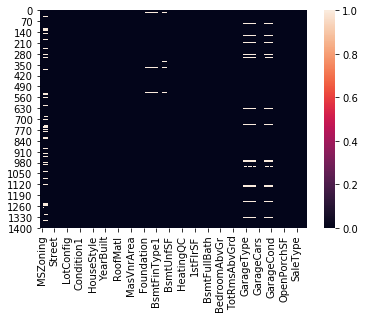

In [20]:
sns.heatmap(df.isnull())

In [21]:
df.dropna(axis=0,inplace=True)

In [22]:
df.isnull().sum()

MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 63, dtype: int64

In [23]:
df.shape

(1095, 63)

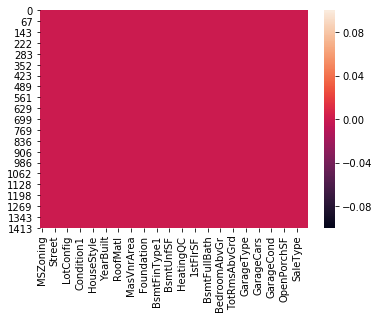

In [24]:
sns.heatmap(df.isnull())

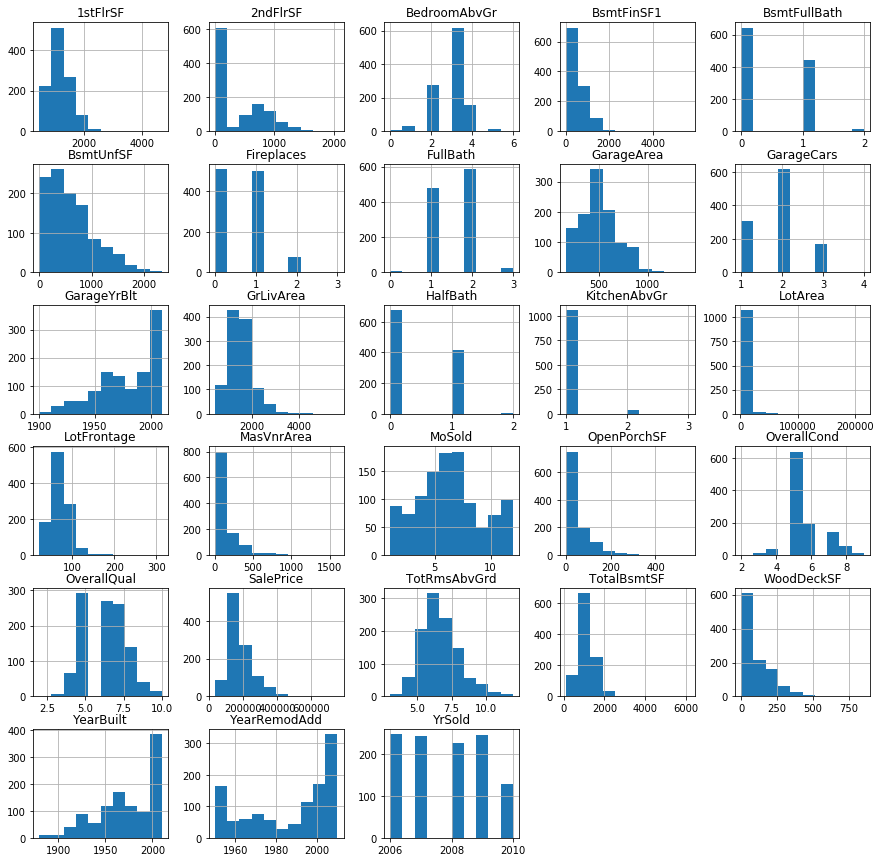

In [25]:
df.hist(figsize=(15,15))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x20172a5f588>,
 'caps': [<matplotlib.lines.Line2D at 0x20172a5fe48>,
 'boxes': [<matplotlib.lines.Line2D at 0x20172a43ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x20172a60dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x20172a62c48>],
 'means': []}

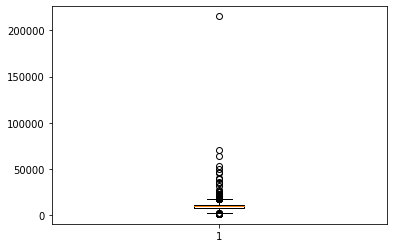

In [26]:
plt.boxplot(df['LotArea'])

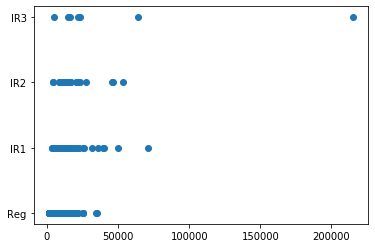

In [27]:
plt.scatter('LotArea','LotShape',data=df)

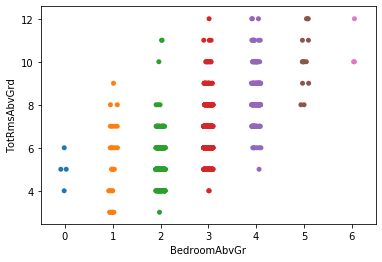

In [28]:
sns.stripplot('BedroomAbvGr','TotRmsAbvGrd',data=df)

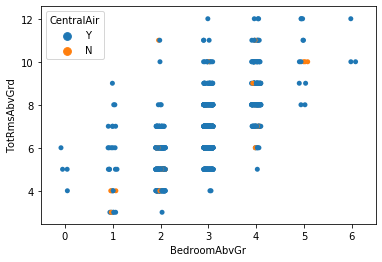

In [29]:
sns.stripplot('BedroomAbvGr','TotRmsAbvGrd',hue='CentralAir',data=df)

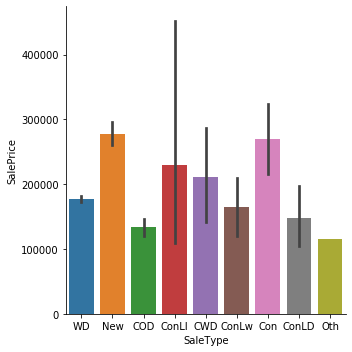

In [30]:
sns.catplot('SaleType','SalePrice',data=df,kind='bar')

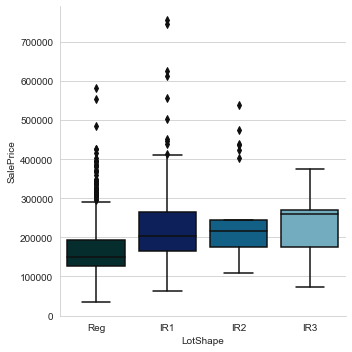

In [31]:
sns.set_style('whitegrid')
sns.catplot('LotShape','SalePrice',data=df,kind='box',palette='ocean')


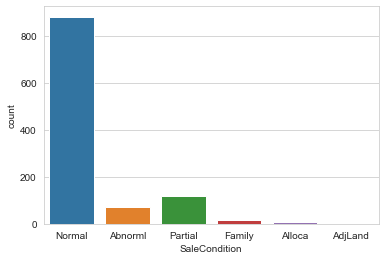

In [32]:
sns.countplot(df['SaleCondition'])

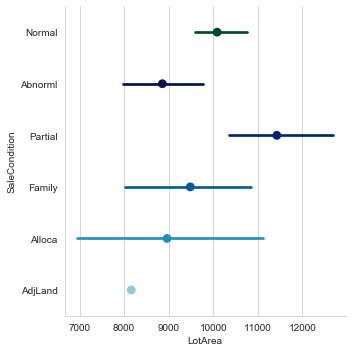

In [33]:
sns.catplot('LotArea','SaleCondition',data=df,palette='ocean',kind='point')

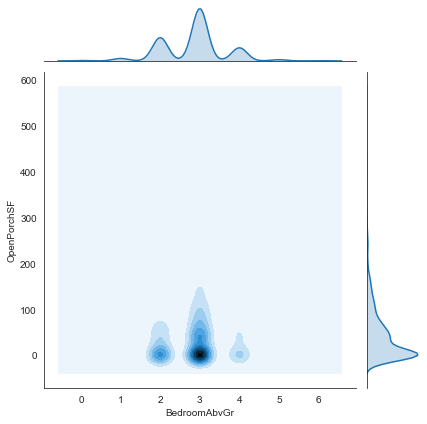

In [34]:
sns.set_style('white')
sns.jointplot('BedroomAbvGr','OpenPorchSF',data=df,kind='kde')

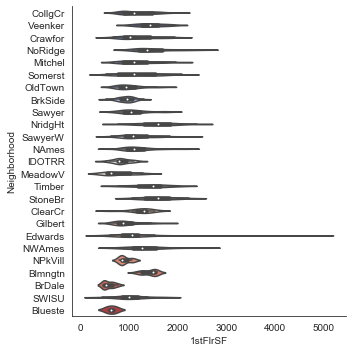

In [39]:
sns.catplot('1stFlrSF','Neighborhood',data=df,palette='coolwarm',kind='violin')

In [36]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
        'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold',
        'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
        'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
        'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
        'Garage

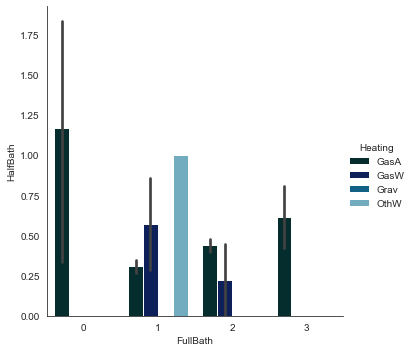

In [41]:
sns.catplot('FullBath','HalfBath',hue='Heating',palette='ocean',kind='bar',data=df)

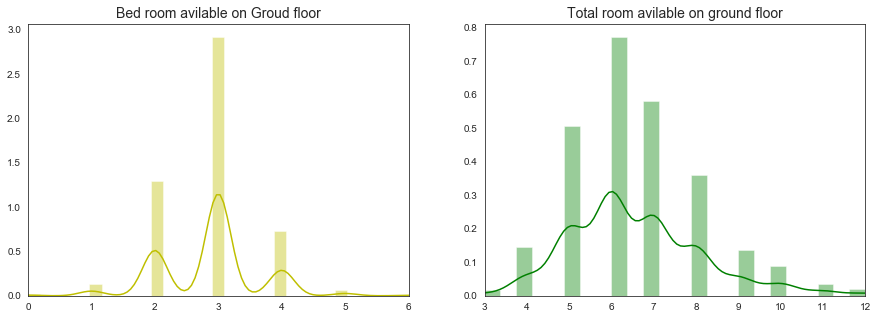

In [42]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

Bedroom=df['BedroomAbvGr'].values
TotRms=df['TotRmsAbvGrd'].values

sns.distplot(Bedroom,ax=ax[0],color='y')
ax[0].set_title('Bed room avilable on Groud floor',fontsize=14)
ax[0].set_xlim([min(Bedroom),max(Bedroom)])

sns.distplot(TotRms,ax=ax[1],color='g')
ax[1].set_title('Total room avilable on ground floor',fontsize=14)
ax[1].set_xlim([min(TotRms),max(TotRms)])
plt.show()

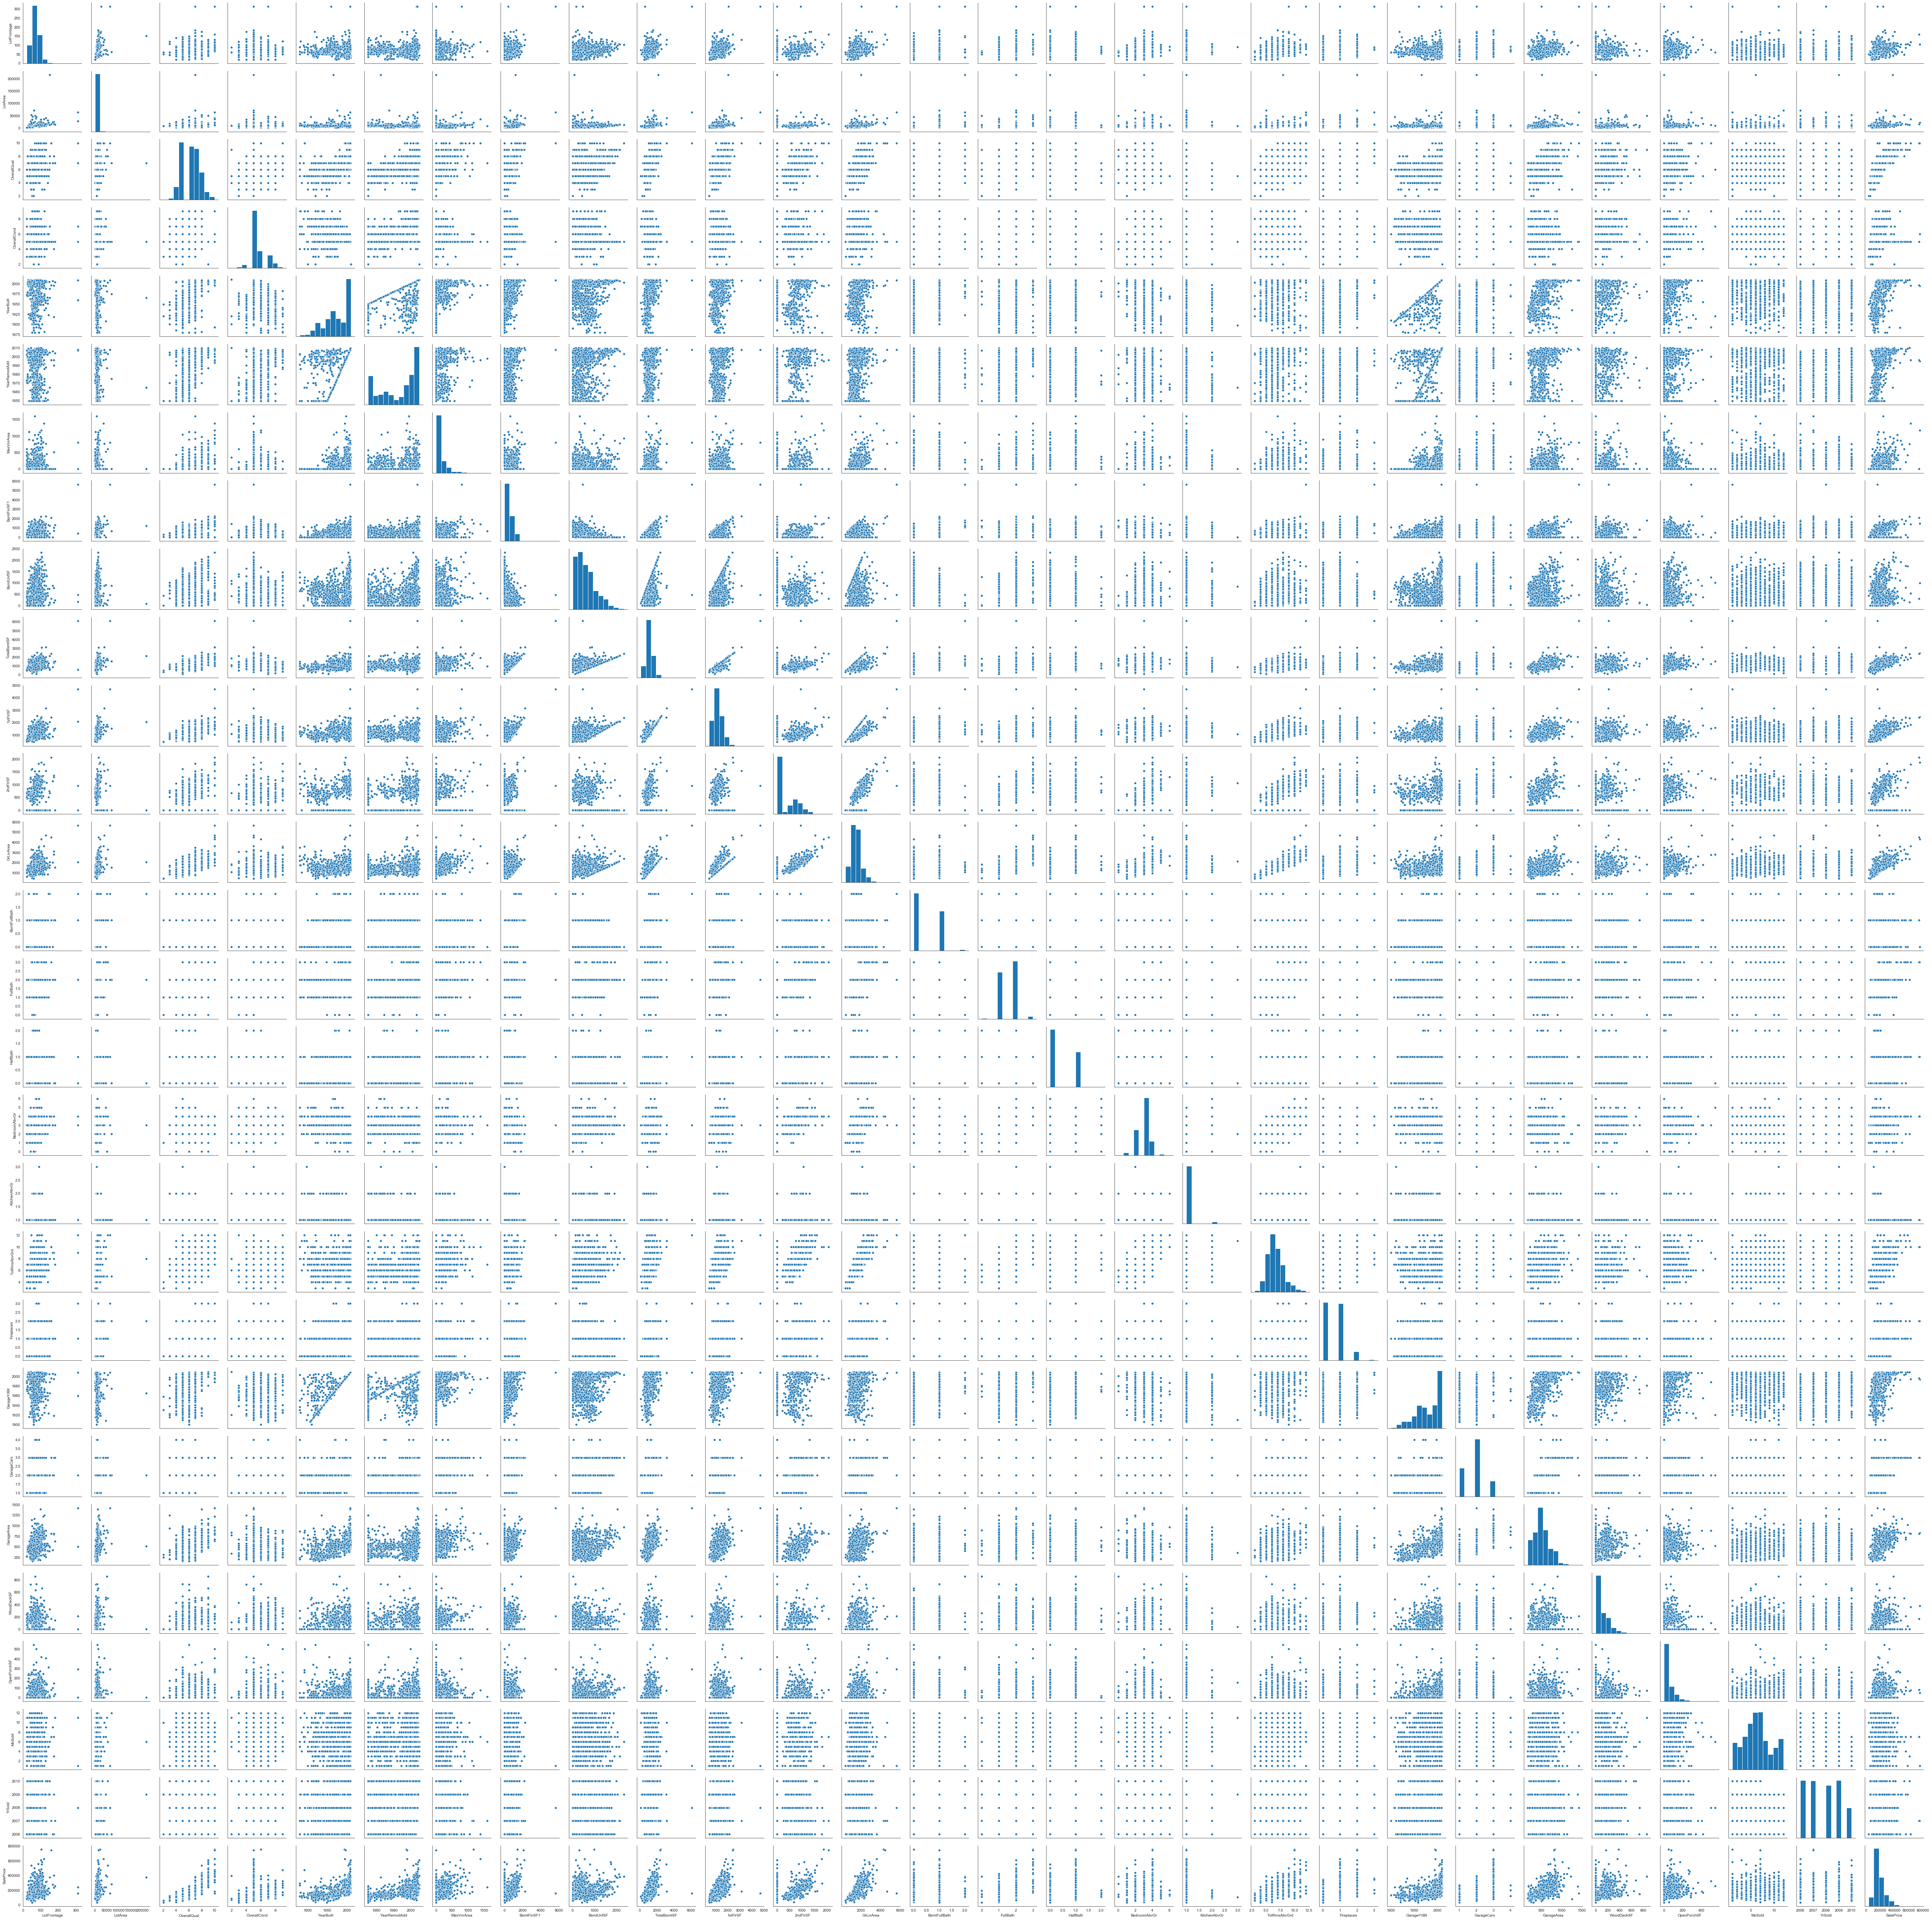

In [43]:
sns.pairplot(df)

In [165]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['LotArea', 'YearBuilt', 'YearRemodAdd', '2ndFlrSF', 'FullBath',
        'BedroomAbvGr', 'TotRmsAbvGrd', 'WoodDeckSF', 'OpenPorchSF',
        'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['MasVnrArea'], dtype='object'),
 dtype('O'): Index(['Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
        'MasVnrType', 'ExterQual', 'Foundation', 'BsmtExposure', 'BsmtFinType1',
        'CentralAir', 'KitchenQual', 'GarageType', 'GarageQual', 'GarageCond',
        'SaleType', 'SaleCondition'],
       dtype='object')}

In [46]:
le=LabelEncoder()
#oh=OneHotEncoder()

In [47]:
le_count=0

for col in df.columns[0:]:
    if df[col].dtype=='object':
        if len(list(df[col].unique())) <=25:
            le.fit(df[col])
            df[col]=le.transform(df[col])
            le_count +=1
print('{} columns were labell encoded.'.format(le_count))

35 columns were labell encoded.


In [48]:
z=np.abs(stats.zscore(df))
print(z)

[[0.04465052 0.23499482 0.20545578 ... 0.33592996 0.16544893 0.25829667]
 [0.04465052 0.37757302 0.06530726 ... 0.33592996 0.16544893 0.06665409]
 [0.04465052 0.11248125 0.1357754  ... 0.33592996 0.16544893 0.43882487]
 ...
 [0.04465052 0.19415697 0.13330976 ... 0.33592996 0.16544893 0.95633905]
 [0.04465052 0.11248125 0.05104867 ... 0.33592996 0.16544893 0.54054062]
 [0.04465052 0.17338374 0.02423765 ... 0.33592996 0.16544893 0.47585134]]


In [49]:
threshold=3
print(np.where(z>3))

(array([   3,    5,    7, ..., 1092, 1093, 1094], dtype=int64), array([61, 24, 43, ..., 22, 35, 56], dtype=int64))


In [50]:
df=df[(z<3).all(axis=1)]

In [51]:
df.shape

(562, 63)

In [52]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)

IQR=Q3-Q1
print(IQR)

MSZoning             0.00
LotFrontage         20.00
LotArea           3222.25
Street               0.00
LotShape             3.00
                   ...   
MoSold               3.00
YrSold               2.00
SaleType             0.00
SaleCondition        0.00
SalePrice        81387.50
Length: 63, dtype: float64


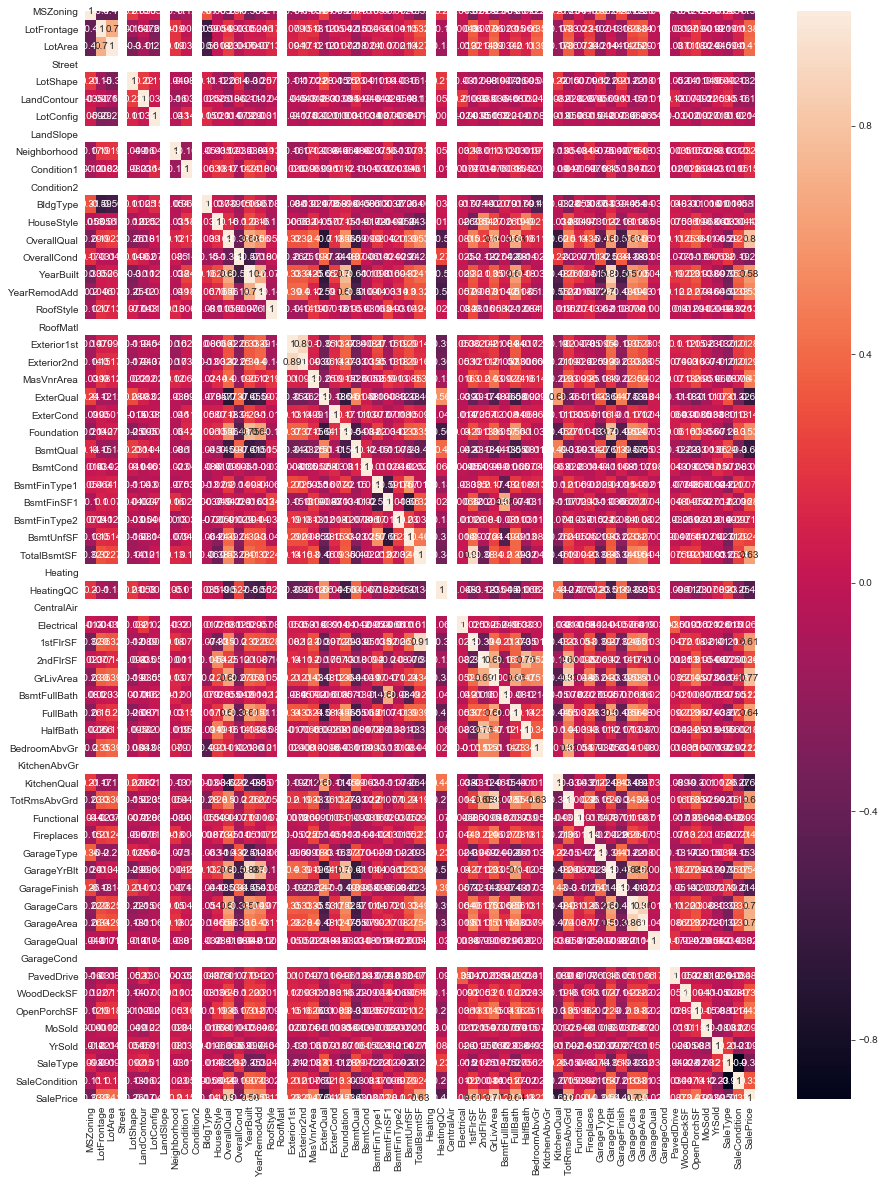

In [56]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(),annot=True)

In [57]:
def calculate_vif(x):
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return (vif)

In [58]:
calculate_vif(df)

Variables        VIF
0        MSZoning   1.876492
1     LotFrontage   2.900592
2         LotArea   2.870714
3          Street   0.000000
4        LotShape   1.382671
..            ...        ...
58         MoSold   1.179470
59         YrSold   1.222103
60       SaleType   6.007450
61  SaleCondition   6.003444
62      SalePrice  11.411874

[63 rows x 2 columns]

In [59]:
df.head()

MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  LotConfig  \
0         3         65.0     8450       1         3            3          4   
1         3         80.0     9600       1         3            3          2   
2         3         68.0    11250       1         0            3          4   
4         3         84.0    14260       1         0            3          2   
6         3         75.0    10084       1         3            3          4   

   LandSlope  Neighborhood  Condition1  ...  GarageQual  GarageCond  \
0          0             5           2  ...           4           4   
1          0            24           1  ...           4           4   
2          0             5           2  ...           4           4   
4          0            15           2  ...           4           4   
6          0            21           2  ...           4           4   

   PavedDrive  WoodDeckSF  OpenPorchSF  MoSold  YrSold  SaleType  \
0           2           0           61       2    2008         8   
1           2         298            0       5    2007         8   
2           2           0           42       9    2008         8   
4           2         192           84      12    2008         8   
6           2         255           57       8    2007         8   

   SaleCondition  SalePrice  
0              4     208500  
1              4     181500  
2              4     223500  
4              4     250000  
6              4     307000  

[5 rows x 63 columns]

In [60]:
x=df.drop('SalePrice',axis=1)
x.head()

MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  LotConfig  \
0         3         65.0     8450       1         3            3          4   
1         3         80.0     9600       1         3            3          2   
2         3         68.0    11250       1         0            3          4   
4         3         84.0    14260       1         0            3          2   
6         3         75.0    10084       1         3            3          4   

   LandSlope  Neighborhood  Condition1  ...  GarageArea  GarageQual  \
0          0             5           2  ...         548           4   
1          0            24           1  ...         460           4   
2          0             5           2  ...         608           4   
4          0            15           2  ...         836           4   
6          0            21           2  ...         636           4   

   GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  MoSold  YrSold  SaleType  \
0           4           2           0           61       2    2008         8   
1           4           2         298            0       5    2007         8   
2           4           2           0           42       9    2008         8   
4           4           2         192           84      12    2008         8   
6           4           2         255           57       8    2007         8   

   SaleCondition  
0              4  
1              4  
2              4  
4              4  
6              4  

[5 rows x 62 columns]

In [61]:
y=df['SalePrice']
y

0       208500
1       181500
2       223500
4       250000
6       307000
         ...  
1445    129000
1447    240000
1451    287090
1452    145000
1455    175000
Name: SalePrice, Length: 562, dtype: int64

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [69]:
ln=LinearRegression()

ln.fit(x_train,y_train)
pred_ln=ln.predict(x_test)

print(r2_score(y_test,pred_ln))
print(mean_squared_error(y_test,pred_ln))
print(mean_absolute_error(y_test,pred_ln))
score=cross_val_score(ln,x,y,cv=5)

0.8561368829482241
378479196.6829359
14037.725623132312


In [70]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)

print(r2_score(y_test,pred_dtr))
print(mean_squared_error(y_test,pred_dtr))
print(mean_absolute_error(y_test,pred_ln))

0.6506037653782868
919201591.8581561
14037.725623132312


In [71]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred_knr=knr.predict(x_test)

print(r2_score(y_test,pred_knr))
print(mean_squared_error(y_test,pred_knr))
print(mean_absolute_error(y_test,pred_knr))

0.6767838752890531
850326211.0714893
21369.329078014187


In [72]:
dtr=RandomForestRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)

print(r2_score(y_test,pred_dtr))
print(mean_squared_error(y_test,pred_dtr))
print(mean_absolute_error(y_test,pred_dtr))

0.8513342547070015
391114088.21007097
13716.682269503548


In [186]:
from sklearn.externals import joblib

In [187]:
joblib.dump(ln,'HousePricePrediction.obj')

['HousePricePrediction.obj']